In [1]:
#Enable GPU use
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPus available: ", len(physical_devices))
if(len(physical_devices)!=0):
    tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPus available:  0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [3]:
with open('features.pk', 'rb') as handle:
    data = pickle.load(handle)
#data = data.drop(columns=['MeetTijd','Length_MeetTijd','startTime','endTime'])

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
sm = SMOTE(random_state = 2) 


In [5]:
cols = data.columns
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns = cols
cols

Index(['IcNaOk', 'MeetTijd in seconds', 'Mean HR(bpm)', 'Std HR(bpm)',
       'Max HR(bpm)', 'Min HR(bpm)', 'Mode HR(bpm)', 'Median HR(bpm)',
       'Mean SpO2(%)', 'Std SpO2(%)', 'Max SpO2(%)', 'Min SpO2(%)',
       'Mode SpO2(%)', 'Median SpO2(%)', 'Mean NIBP(mmHg)', 'Std NIBP(mmHg)',
       'Max NIBP(mmHg)', 'Min NIBP(mmHg)', 'Mode NIBP(mmHg)',
       'Median NIBP(mmHg)', 'Mean HR*Sp', 'Std HR*Sp', 'Max HR*Sp',
       'Min HR*Sp', 'Mode HR*Sp', 'Median HR*Sp', 'Mean HR*NIBP',
       'Std HR*NIBP', 'Max HR*NIBP', 'Min HR*NIBP', 'Mode HR*NIBP',
       'Median HR*NIBP', 'Mean Sp*NIBP', 'Std Sp*NIBP', 'Max Sp*NIBP',
       'Min Sp*NIBP', 'Mode Sp*NIBP', 'Median Sp*NIBP', 'Mean HR*Sp*NIBP',
       'Std HR*Sp*NIBP', 'Max HR*Sp*NIBP', 'Min HR*Sp*NIBP', 'Mode HR*Sp*NIBP',
       'Median HR*Sp*NIBP'],
      dtype='object')

In [6]:
data

,IcNaOk,MeetTijd in seconds,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),Mode HR(bpm),Median HR(bpm),Mean SpO2(%),Std SpO2(%),...,Max Sp*NIBP,Min Sp*NIBP,Mode Sp*NIBP,Median Sp*NIBP,Mean HR*Sp*NIBP,Std HR*Sp*NIBP,Max HR*Sp*NIBP,Min HR*Sp*NIBP,Mode HR*Sp*NIBP,Median HR*Sp*NIBP
0,0.0,0.191535,0.182784,0.382527,0.623762,0.336134,0.297872,0.106796,0.807914,0.356847,...,0.377844,0.005535,0.481757,0.286978,0.184963,0.361890,0.487468,0.003240,0.132029,0.123251
1,0.0,0.271186,0.245498,0.095441,0.198020,0.445378,0.425532,0.233010,0.853343,0.188262,...,0.240043,0.005244,0.575373,0.381177,0.264001,0.127748,0.137865,0.003745,0.213722,0.253748
2,0.0,0.235991,0.521027,0.188244,0.311881,0.537815,0.716312,0.567961,0.740494,0.342242,...,0.290773,0.005611,0.004384,0.203985,0.346698,0.499749,0.225658,0.004708,0.005715,0.309340
3,0.0,0.092896,0.229809,0.076698,0.183168,0.462185,0.411348,0.223301,0.809704,0.153266,...,0.245618,0.005549,0.635713,0.433753,0.258519,0.201038,0.146605,0.003638,0.237469,0.277547
4,0.0,0.220339,0.416532,0.120516,0.549505,0.563025,0.560284,0.407767,0.682715,0.355829,...,0.546824,0.005539,0.000214,0.379787,0.386654,0.446088,0.549388,0.004353,0.002026,0.384725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,1.0,0.076225,0.268510,0.087930,0.188119,0.453782,0.439716,0.262136,0.997319,0.031729,...,0.222405,0.440503,0.365087,0.124868,0.171652,0.137933,0.125695,0.307570,0.181319,0.140887
6121,1.0,0.120682,0.420870,0.179645,0.366337,0.546218,0.560284,0.398058,0.886442,0.376236,...,0.211026,0.432094,0.401515,0.099591,0.275607,0.227183,0.224028,0.364246,0.177437,0.223780
6122,1.0,0.115750,0.320658,0.108992,0.262376,0.478992,0.510638,0.320388,1.000000,0.000000,...,0.472746,0.457666,0.684795,0.436618,0.355420,0.281837,0.265238,0.305427,0.509369,0.346743
6123,1.0,0.115032,0.689754,0.168391,0.485149,0.764706,0.737589,0.655340,0.969292,0.169687,...,0.154130,0.411899,0.392104,0.074314,0.411937,0.233150,0.283784,0.505897,0.279319,0.358889


In [7]:
train, test = train_test_split(data, test_size=0.3)

In [8]:
X_train = train.drop(columns=['IcNaOk'])
y_train = train['IcNaOk']
X_test = test.drop(columns=['IcNaOk'])
y_test = test['IcNaOk']

In [9]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [10]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
model = tf.keras.Sequential([
    Dense(160, input_shape=(43,), activation='relu'), #second layer
    Dense(50, activation='relu'),
    Dense(2, activation='softmax') #gives probability of ICU admission
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                8050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 15,192
Trainable params: 15,192
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'], loss_weights=[1,10000])

In [13]:
model.fit(x=X_train_res, y=y_train_res, batch_size=10, epochs=40, verbose=2, validation_split=0.1) #class_weight={0:0.1,1:0.9} important

Epoch 1/40
692/692 - 2s - loss: 0.6080 - accuracy: 0.7104 - val_loss: 0.6432 - val_accuracy: 0.6810
Epoch 2/40
692/692 - 1s - loss: 0.5397 - accuracy: 0.7639 - val_loss: 0.5008 - val_accuracy: 0.7969
Epoch 3/40
692/692 - 1s - loss: 0.5169 - accuracy: 0.7747 - val_loss: 0.6188 - val_accuracy: 0.6992
Epoch 4/40
692/692 - 1s - loss: 0.5016 - accuracy: 0.7802 - val_loss: 0.5034 - val_accuracy: 0.7878
Epoch 5/40
692/692 - 1s - loss: 0.4915 - accuracy: 0.7823 - val_loss: 0.5021 - val_accuracy: 0.7656
Epoch 6/40
692/692 - 1s - loss: 0.4803 - accuracy: 0.7880 - val_loss: 0.5881 - val_accuracy: 0.6914
Epoch 7/40
692/692 - 1s - loss: 0.4724 - accuracy: 0.7918 - val_loss: 0.5619 - val_accuracy: 0.7018
Epoch 8/40
692/692 - 1s - loss: 0.4630 - accuracy: 0.7928 - val_loss: 0.4621 - val_accuracy: 0.7812
Epoch 9/40
692/692 - 1s - loss: 0.4570 - accuracy: 0.7956 - val_loss: 0.5481 - val_accuracy: 0.7018
Epoch 10/40
692/692 - 1s - loss: 0.4497 - accuracy: 0.7934 - val_loss: 0.5366 - val_accuracy: 0.7057

In [14]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
predictions = model.predict(x=X_test, batch_size=10,verbose=2)
rounded_predictions = np.argmax(predictions,axis=-1)
rounded_predictions

184/184 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8281
Test score: 0.40293088555336
Test accuracy: 0.8280739784240723
184/184 - 0s


array([0, 1, 0, ..., 1, 0, 0])

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_true = y_test, y_pred=rounded_predictions)

In [17]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1380  260]
 [  56  142]]


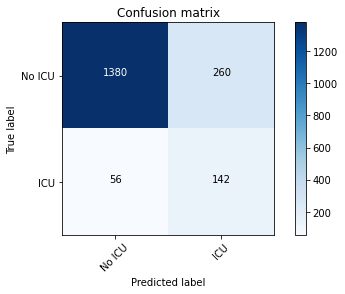

In [18]:
cm_plot_labels = ['No ICU','ICU']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [19]:
from sklearn.metrics import roc_curve
y_pred_keras = np.argmax(model.predict(X_test),axis=-1).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [20]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

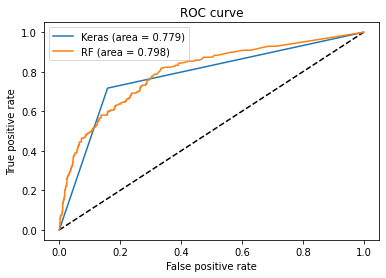

In [22]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

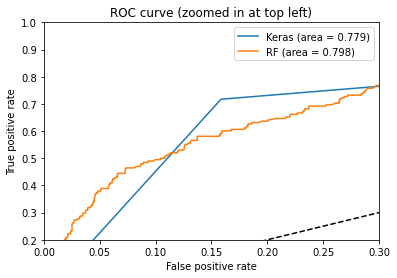

In [23]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.3)
plt.ylim(0.2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Adjusted weights

In [24]:
model1 = tf.keras.Sequential([
    Dense(68, input_shape=(43,), activation='relu'), #second layer
    Dense(78, activation='relu'),
    Dense(2, activation='softmax') #gives probability of ICU admission
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.summary()

model2 = tf.keras.Sequential([
    Dense(68, input_shape=(43,), activation='relu'), #second layer
    Dense(78, activation='relu'),
    Dense(2, activation='softmax') #gives probability of ICU admission
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.summary()

model3 = tf.keras.Sequential([
    Dense(68, input_shape=(43,), activation='relu'), #second layer
    Dense(78, activation='relu'),
    Dense(2, activation='softmax') #gives probability of ICU admission
])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 68)                2992      
_________________________________________________________________
dense_4 (Dense)              (None, 78)                5382      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 158       
Total params: 8,532
Trainable params: 8,532
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 68)                2992      
_________________________________________________________________
dense_7 (Dense)              (None, 78)                5382      
______________________________

In [25]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model1.fit(x=X_train_res, y=y_train_res, batch_size=10, epochs=40, verbose=2, validation_split=0.1,class_weight={0:1,1:1.5})  #important
model2.fit(x=X_train_res, y=y_train_res, batch_size=10, epochs=40, verbose=2, validation_split=0.1,class_weight={0:1,1:1.4}) #class_weight={0:0.1,1:0.9} #important
model3.fit(x=X_train_res, y=y_train_res, batch_size=10, epochs=40, verbose=2, validation_split=0.1,class_weight={0:1,1:1.3}) #class_weight={0:0.1,1:0.9} #important

Epoch 1/40
692/692 - 2s - loss: 0.7702 - accuracy: 0.5949 - val_loss: 0.4592 - val_accuracy: 0.8789
Epoch 2/40
692/692 - 1s - loss: 0.6805 - accuracy: 0.7199 - val_loss: 0.4145 - val_accuracy: 0.8516
Epoch 3/40
692/692 - 1s - loss: 0.6484 - accuracy: 0.7422 - val_loss: 0.4819 - val_accuracy: 0.7943
Epoch 4/40
692/692 - 1s - loss: 0.6313 - accuracy: 0.7538 - val_loss: 0.3878 - val_accuracy: 0.8490
Epoch 5/40


KeyboardInterrupt: 

In [ ]:
score, acc = model1.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
predictions = model1.predict(x=X_test, batch_size=10,verbose=2)
rounded_predictions = np.argmax(predictions,axis=-1)
rounded_predictions

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred=rounded_predictions)
cm_plot_labels = ['No ICU','ICU']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [ ]:
score, acc = model2.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
predictions = model2.predict(x=X_test, batch_size=10,verbose=2)
rounded_predictions = np.argmax(predictions,axis=-1)
rounded_predictions

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred=rounded_predictions)
cm_plot_labels = ['No ICU','ICU']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [ ]:
score, acc = model3.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
predictions = model3.predict(x=X_test, batch_size=10,verbose=2)
rounded_predictions = np.argmax(predictions,axis=-1)
rounded_predictions

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred=rounded_predictions)
cm_plot_labels = ['No ICU','ICU']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [ ]:
def create_model(neurons1,neurons2):
    model = tf.keras.Sequential([
    Dense(neurons1, input_shape=(43,), activation='relu'), #second layer
    Dense(neurons2, activation='relu'),
    Dense(2, activation='softmax') #gives probability of ICU admission
    ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    model.summary()
    model.fit(x=X_train_res, y=y_train_res, batch_size=100, epochs=20, verbose=0, validation_split=0.1)
    return model

In [ ]:
a = create_model(88,100)

In [ ]:
score, acc = a.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
neurons1 = range(2,40,2)
neurons2 = range(2,40,2)

In [ ]:
score, acc = model1.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
results = np.zeros(shape=(len(neurons1),len(neurons2)))

In [ ]:
index1 = -1
index2 = -1
for i in neurons1:
    index1+=1
    for j in neurons2:
        index2+=1
        current_model = create_model(i,j)
        score, acc = current_model.evaluate(X_test, y_test,
                            batch_size=10)
        print(index2)
        results[index1][index2] = score
    index2 = -1

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

plt.close()
plt.imshow(results, interpolation='none')
plt.colorbar()
ax = plt.gca()
ax.set_xticks(range(0,len(neurons1)))
ax.set_yticks(range(0,len(neurons1)))
ax.set_xticklabels(np.array(neurons1).astype(str))
ax.set_yticklabels(np.array(neurons2).astype(str))
ax.set_ylabel('Neurons hidden layer 1')
ax.set_xlabel('Neurons hidden layer 2')
plt.xticks(rotation=70)
plt.title('Gridsearch number of neurons')
fig = plt.gcf()
plt.draw()
fig.set_size_inches(5, 5)
fig.savefig('Gridsearch neurons3.png', dpi=200)
plt.show()

In [ ]:
best_model = create_model(68,78)
score, acc = current_model.evaluate(X_test, y_test,
                            batch_size=10)
print(acc)

In [ ]:
best_model.summary()